In [1]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt

/home/fabian/mambaforge/envs/mdanalysis/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/fabian/mambaforge/envs/mdanalysis/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib


In [22]:
def angle_between_points(A, B, C):
    BA = A - B
    BC = C - B
    cosine_angle = np.dot(BA, BC) / (np.linalg.norm(BA) * np.linalg.norm(BC))
    angle = np.arccos(cosine_angle)
    return np.degrees(angle)

### IFNL3

In [45]:
ifnl3 = mda.Universe('ifnl3/protein_ions_chimera.pdb', 'ifnl3/300ns_protein_ions.xtc')

In [46]:
il10rb = ifnl3.select_atoms('segid A and resid 20-111')
lr1 = ifnl3.select_atoms('segid B and resid 6-103')
l3 = ifnl3.select_atoms('segid C')


In [47]:
angles_ifnl3 = []  # A list to store the angles for each frame

for ts in ifnl3.trajectory:
    COM1 = il10rb.center_of_mass()
    COM3 = lr1.center_of_mass()
    COM2 = l3.center_of_mass()
    
    angle = angle_between_points(COM1, COM2, COM3)
    angles_ifnl3.append(angle)

### IFNL4

In [48]:
ifnl4 = mda.Universe('ifnl4/a3/protein_ions_label.pdb', 'ifnl4/a3/300ns_protein_ions.xtc')

In [49]:
il10rb = ifnl4.select_atoms('segid A and resid 20-111')
lr1 = ifnl4.select_atoms('segid B and resid 6-103')
l4 = ifnl4.select_atoms('segid C')

In [50]:
angles_ifnl4 = []  # A list to store the angles for each frame

for ts in ifnl4.trajectory:
    COM1 = il10rb.center_of_mass()
    COM3 = lr1.center_of_mass()
    COM2 = l4.center_of_mass()
    
    angle = angle_between_points(COM1, COM2, COM3)
    angles_ifnl4.append(angle)

### Plot angles

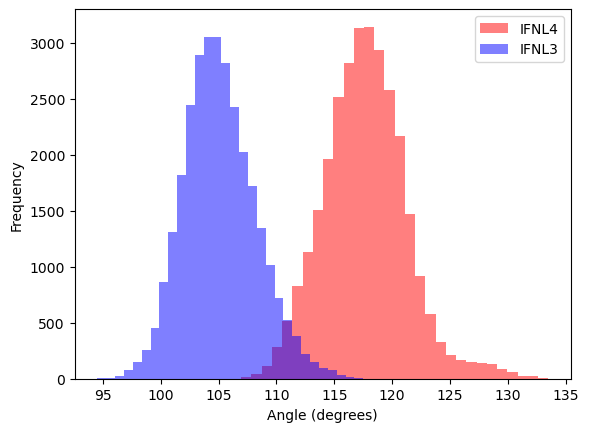

In [51]:


# Create a figure and axes
fig, ax = plt.subplots()

# Plot the distribution of angles for ifnl4
ax.hist(angles_ifnl4, bins=30, alpha=0.5, label='IFNL4', color='red')

# Plot the distribution of angles for ifnl3
ax.hist(angles_ifnl3, bins=30, alpha=0.5, label='IFNL3', color='blue')

# Set the labels and title
ax.set_xlabel('Angle (degrees)')
ax.set_ylabel('Frequency')
#ax.set_title('Distribution of Angles')

# Add a legend
ax.legend()

# Show the plot
plt.show()

In [52]:
mean_ifnl4 = np.mean(angles_ifnl4)
mean_ifnl3 = np.mean(angles_ifnl3)
mean_difference = mean_ifnl4 - mean_ifnl3

mean_difference


12.5647946897367

In [53]:
import numpy as np

std_ifnl3 = np.std(angles_ifnl3)
std_ifnl4 = np.std(angles_ifnl4)

std_ifnl3, std_ifnl4


(3.105676831689452, 3.575129251402514)